In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [ ]:
!kaggle datasets download "sudalairajkumar/daily-temperature-of-major-cities"

 62% 8.00M/12.9M [00:00<00:00, 80.1MB/s]
100% 12.9M/12.9M [00:00<00:00, 79.6MB/s]


In [ ]:
!unzip daily-temperature-of-major-cities.zip

Archive:  daily-temperature-of-major-cities.zip
  inflating: city_temperature.csv    


In [ ]:
!kaggle datasets download "giodev11/usstates-dataset"

  0% 0.00/18.4k [00:00<?, ?B/s]
100% 18.4k/18.4k [00:00<00:00, 10.9MB/s]


In [ ]:
!unzip usstates-dataset.zip

Archive:  usstates-dataset.zip
  inflating: state-abbrevs.csv       
  inflating: state-areas.csv         
  inflating: state-population.csv    


In [ ]:
!pip install plotly
!pip install chart_studio

Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.tools as tls
import plotly as py
import plotly.express as px
import plotly
import plotly.graph_objects as go
import datetime
import chart_studio.tools as tls
tls.set_credentials_file(username='zliu20', api_key='pPDiaStcC657ixzJvRKD')
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from chart_studio import plotly as py
from plotly.offline import iplot
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

%matplotlib inline

Loading the data into the data frame + Exploring The Data



In [ ]:
import pandas
df = pd.read_csv("city_temperature.csv", low_memory=False)
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [ ]:
USA=df[df['Country']=='US']
USA.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1450990,North America,US,Alabama,Birmingham,1,1,1995,50.7
1450991,North America,US,Alabama,Birmingham,1,2,1995,37.2
1450992,North America,US,Alabama,Birmingham,1,3,1995,33.2
1450993,North America,US,Alabama,Birmingham,1,4,1995,33.3
1450994,North America,US,Alabama,Birmingham,1,5,1995,26.4


Dropping the duplicate rows

In [ ]:
USA = USA.drop_duplicates()
USA.shape

(1436807, 8)

In [ ]:
USA.count()

Region            1436807
Country           1436807
State             1436807
City              1436807
Month             1436807
Day               1436807
Year              1436807
AvgTemperature    1436807
dtype: int64

Checking for Missing/ Null values

In [ ]:
for col in USA.columns:
    print("The " + col + " contains Nan" + ":" + str((USA[col].isna().any())))

The Region contains Nan:False
The Country contains Nan:False
The State contains Nan:False
The City contains Nan:False
The Month contains Nan:False
The Day contains Nan:False
The Year contains Nan:False
The AvgTemperature contains Nan:False


Dropping the no-data flag : -99 values in Avg Temperature

In [ ]:
USA = USA[USA['AvgTemperature'] != -99]
USA.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1450990,North America,US,Alabama,Birmingham,1,1,1995,50.7
1450991,North America,US,Alabama,Birmingham,1,2,1995,37.2
1450992,North America,US,Alabama,Birmingham,1,3,1995,33.2
1450993,North America,US,Alabama,Birmingham,1,4,1995,33.3
1450994,North America,US,Alabama,Birmingham,1,5,1995,26.4


Correlation and Bubble Slider

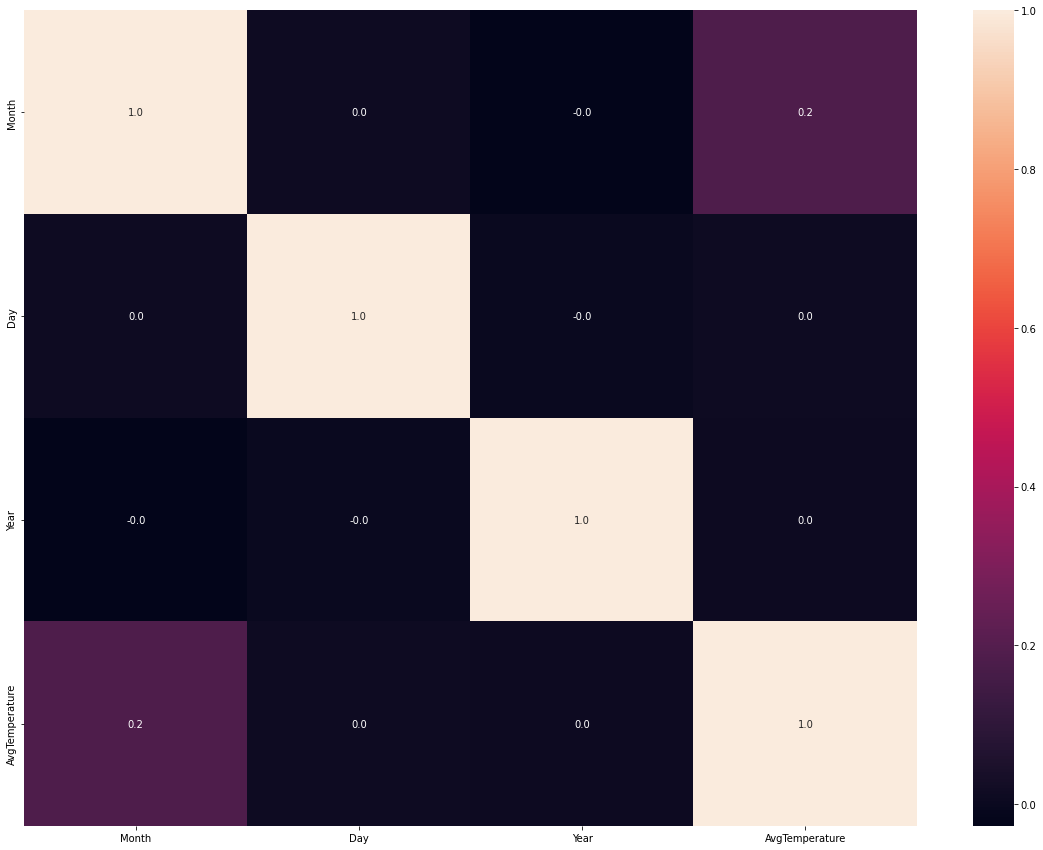

In [ ]:
plt.figure(figsize=(20,15))

sns.heatmap(USA.corr(), annot = True, fmt = ".1f");

In [ ]:
corrM = USA.corr()
corrM

corrM.style.background_gradient(cmap='coolwarm')

,Month,Day,Year,AvgTemperature
Month,1.000000,0.009870,-0.027340,0.185103
Day,0.009870,1.000000,-0.002084,0.011020
Year,-0.027340,-0.002084,1.000000,0.005946
AvgTemperature,0.185103,0.011020,0.005946,1.000000


Drop 2020 data because it's not full 12 month data

In [ ]:
USA = USA[USA['Year'] != 2020]
USA['Year'].max()

2019

In [ ]:
data = USA[['Year','AvgTemperature']].groupby('Year').mean()
linfit = np.polyfit(data.index,data['AvgTemperature'],deg=1)
linfit = linfit[0]*data.index + linfit[1]

fig = px.line(data,title='Average Temperature of the US from 1995 to 2019')
fig.add_trace(go.Scatter(x=data.index,y=linfit,name='Linear Fit'))
fig.show(renderer="colab")

In [ ]:
USA_AvgTemp=USA.loc[USA["Country"] == "US"].groupby("State").mean().drop(["Additional Territories"], axis = 0)
USA_AvgTemp.head()

,Month,Day,Year,AvgTemperature
State,,,,
Alabama,6.522319,15.723477,2007.011084,64.529724
Alaska,6.521057,15.721686,2007.006398,36.428500
Arizona,6.500986,15.725370,2004.889026,69.976146
Arkansas,6.523101,15.722344,2007.012127,62.499018
California,6.522859,15.722087,2007.013037,61.956388


In [ ]:
usa_codes = pd.read_csv('state-abbrevs.csv')
# Duplicate columns
usa_codes['State'] = usa_codes['state']
# Set new index
usa_codes.drop("state",axis=1,inplace=True)

# Rename columns
usa_codes.rename(columns={'abbreviation': 'Code'}, inplace=True)
usa_codes =usa_codes.set_index("State")
Average_Temperature_USA = pd.merge(USA_AvgTemp,
                                   usa_codes,how = "left",right_index = True,left_index = True)
Average_Temperature_USA.head()

,Month,Day,Year,AvgTemperature,Code
State,,,,,
Alabama,6.522319,15.723477,2007.011084,64.529724,AL
Alaska,6.521057,15.721686,2007.006398,36.428500,AK
Arizona,6.500986,15.725370,2004.889026,69.976146,AZ
Arkansas,6.523101,15.722344,2007.012127,62.499018,AR
California,6.522859,15.722087,2007.013037,61.956388,CA


In [ ]:
Average_Temperature_USA=Average_Temperature_USA.reset_index()

Average of Average Temperature recorded in USA

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    States = json.load(response)



import plotly.express as px

fig = px.choropleth_mapbox(Average_Temperature_USA, geojson=States, locations='State',featureidkey="properties.name", color='AvgTemperature',
                           color_continuous_scale="temps",
                           range_color=(20,80),
                           mapbox_style="carto-positron",
                           center = {"lat": 37.0902, "lon": -95.7129},
                           zoom=3, 
                           opacity=1,
                           labels={'AvgTemperature':'Average temperature'},
                           title="Average temperature recorded Statewise"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="colab")

Maximum of Average temperature recorded in USA

In [ ]:
USA_max=pd.DataFrame(USA.groupby('State')['AvgTemperature'].max())

In [ ]:
USA_max=USA_max.reset_index()
USA_max.sort_values('AvgTemperature',ascending=False)
USA_max.head()

,State,AvgTemperature
0,Additional Territories,89.2
1,Alabama,91.5
2,Alaska,79.5
3,Arizona,107.7
4,Arkansas,100.7


In [ ]:
USA_max['State'].unique()

array(['Additional Territories', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    States = json.load(response)



import plotly.express as px

fig = px.choropleth_mapbox(USA_max, geojson=States, locations='State',featureidkey="properties.name", color='AvgTemperature',
                            color_continuous_scale="temps",
                           range_color=(60,110),
                           mapbox_style="carto-positron",
                           center = {"lat": 37.0902, "lon": -95.7129},
                           zoom=3, 
                           opacity=1,
                           labels={'AvgTemperature':'Maximum temperature'},
                           title="Maximum temperature recorded Statewise"
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
py.iplot(fig,filename="maximum temp")

The below plot shows the chosen states maximum recorded and average temperature over the years and their difference .

- North , West parts of USA: Kansas, Illinois, California, Utah, South Dakota

- South, East part of USA: Alabama, Florida, New York, Georgia, Maine

- Special Case: Alaska

In [ ]:
states_analysis=['Alabama','Alaska','Illinois','California','South Dakota','Kansas','New York','Utah','Maine','Georgia','Florida']
analysis_states=pd.DataFrame()
#for s in states_analysis:
    #l=pd.Dataframe(Average_Temperature_USA[Average_Temperature_USA['State']=s])
    #analysis_states=analysis_states.append(Average_Temperature_USA['State']=s)
    #print(s)
analysis_states=Average_Temperature_USA[Average_Temperature_USA['State'].isin(states_analysis)]
analysis_states.head()

,State,Month,Day,Year,AvgTemperature,Code
0,Alabama,6.522319,15.723477,2007.011084,64.529724,AL
1,Alaska,6.521057,15.721686,2007.006398,36.428500,AK
4,California,6.522859,15.722087,2007.013037,61.956388,CA
9,Florida,6.511223,15.722679,2006.575812,72.198032,FL
10,Georgia,6.521256,15.718982,2007.017658,64.836439,GA


In [ ]:
analysis_states1=USA_max[USA_max['State'].isin(states_analysis)]
analysis_states1=analysis_states1.reset_index()
analysis_states1.drop('index',axis=1,inplace=True)
analysis_states1.rename(columns={'AvgTemperature':'Max Temp'},inplace=True)
analysis_states1.head()

,State,Max Temp
0,Alabama,91.5
1,Alaska,79.5
2,California,102.6
3,Florida,92.8
4,Georgia,97.7


In [ ]:
analysis_states=analysis_states.merge(analysis_states1,left_on='State',right_on='State',how='outer')
analysis_states['difference']=analysis_states['Max Temp']-analysis_states['AvgTemperature']
analysis_states=analysis_states.set_index('State')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.



<Figure size 1080x1080 with 0 Axes>

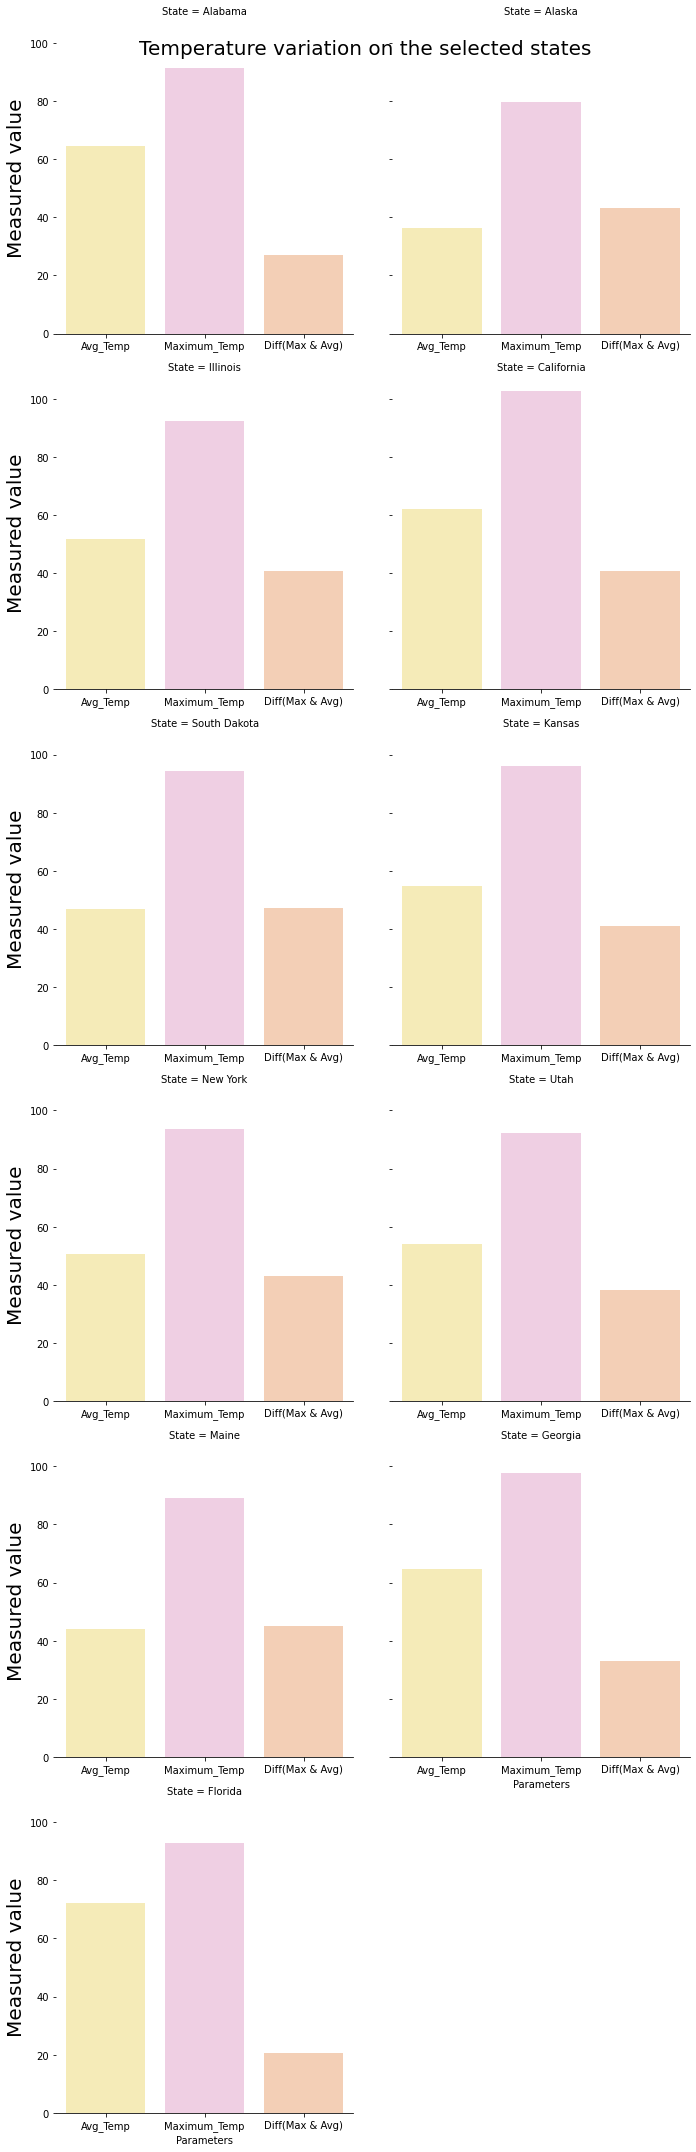

In [ ]:
j=pd.DataFrame()
fig=plt.figure(figsize=(15,15))
df_merge=pd.DataFrame()
plt.suptitle("Temperature variation on the selected states")

for i in range(1,12):
    j=analysis_states.loc[[states_analysis[i-1]]]
    l=[j.at[states_analysis[i-1],'AvgTemperature'],j.at[states_analysis[i-1],'Max Temp'],j.at[states_analysis[i-1],'difference']]
    dict={'State':[states_analysis[i-1],states_analysis[i-1],states_analysis[i-1]],
          'Parameters':['Avg_Temperature','Maximum_Temperature','Difference between Max & Avg'],
          'Measurements':l}
    df=pd.DataFrame(data=dict)
    df_merge=pd.concat([df_merge,df],axis=0)
i=i+1
g=sns.catplot(x="Parameters",y="Measurements",col="State",col_wrap=2,data=df_merge,kind='bar',legend=True,legend_out=True,palette='Pastel2_r',sharex=False)
g.fig.suptitle("Temperature variation on the selected states",fontsize=20)
g.set_xticklabels(['Avg_Temp','Maximum_Temp','Diff(Max & Avg)'], fontsize=8)
g.set_ylabels('Measured value', fontsize= 20)
g.set_xticklabels(fontsize=10)
g.despine(left=True)

In [ ]:
analysis_states['Classification']=['South & East','Special State (Alaska)','North & West','South & East','South & East','North & West','North & West','South & East','South & East','North & West','North & West']
analysis_states

,Month,Day,Year,AvgTemperature,Code,Max Temp,difference,Classification
State,,,,,,,,
Alabama,6.522319,15.723477,2007.011084,64.529724,AL,91.5,26.970276,South & East
Alaska,6.521057,15.721686,2007.006398,36.428500,AK,79.5,43.071500,Special State (Alaska)
California,6.522859,15.722087,2007.013037,61.956388,CA,102.6,40.643612,North & West
Florida,6.511223,15.722679,2006.575812,72.198032,FL,92.8,20.601968,South & East
Georgia,6.521256,15.718982,2007.017658,64.836439,GA,97.7,32.863561,South & East
Illinois,6.524451,15.720659,2007.025632,51.617948,IL,92.3,40.682052,North & West
Kansas,6.521496,15.724379,2007.008452,54.952164,KS,96.1,41.147836,North & West
Maine,6.522417,15.723097,2007.011304,44.175410,ME,89.1,44.924590,South & East
New York,6.521479,15.724301,2007.011656,50.568758,NY,93.7,43.131242,South & East


In [ ]:
analysis_regionwise=analysis_states.groupby('Classification')['difference'].mean()
analysis_regionwise=pd.DataFrame(analysis_regionwise)
analysis_regionwise

,difference
Classification,
North & West,41.616556
South & East,33.698327
Special State (Alaska),43.071500


In [ ]:
Region_values=analysis_regionwise['difference'].to_list()
Region_labels=analysis_regionwise.index.to_list()

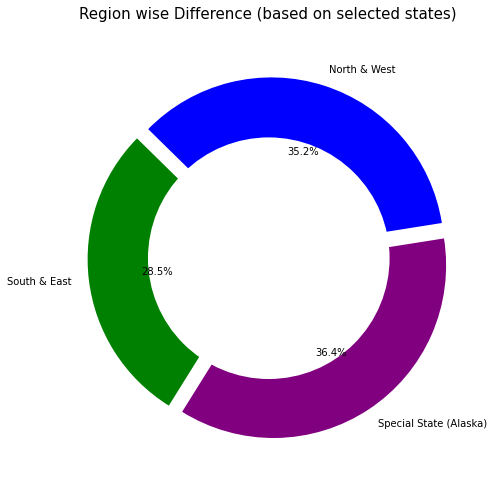

In [ ]:
color=['blue','green','purple']
explode=[]
for i in Region_labels:
    explode.append(0.05)
    
plt.figure(figsize= (7,7))
plt.pie(Region_values, labels=Region_labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')
#centre_circle = plt.Rectangle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Region wise Difference (based on selected states)',fontsize = 15)
plt.axis('equal')  
plt.tight_layout()

In [ ]:
Temperature_USA_year = USA.groupby("Year").mean()
Temperature_USA_year.head()

,Month,Day,AvgTemperature
Year,,,
1995,6.530987,15.720676,56.188958
1996,6.536301,15.749471,54.737213
1997,6.525497,15.720814,55.354560
1998,6.467997,15.590718,58.068899
1999,6.541086,15.736567,57.087630


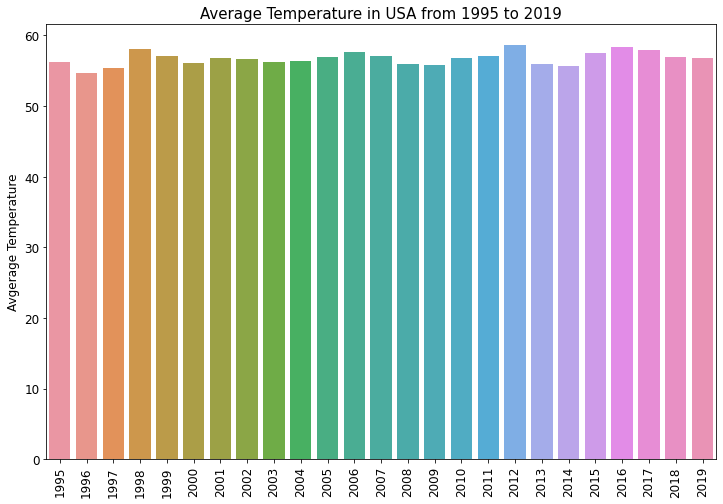

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(x = Temperature_USA_year.index,y = "AvgTemperature",data = Temperature_USA_year)
plt.yticks(size = 12)
plt.xticks(size = 12,rotation = 90)
plt.xlabel(None)
plt.ylabel("Avgerage Temperature",size = 12)
plt.title("Average Temperature in USA from 1995 to 2019",size = 15)
plt.show()

In [ ]:
USA_timeframe=pd.DataFrame(USA.groupby(['State','Year'])['AvgTemperature'].mean())
USA_timeframe=USA_timeframe.reset_index()
USA_timeframe.head()

,State,Year,AvgTemperature
0,Additional Territories,1995,80.619452
1,Additional Territories,1996,78.290187
2,Additional Territories,1997,79.729321
3,Additional Territories,1998,80.038188
4,Additional Territories,1999,79.211585


In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    States = json.load(response)
fig = px.choropleth(USA_timeframe,geojson=States,locations="State",featureidkey="properties.name", 
              color="AvgTemperature", hover_name="State", animation_frame="Year",range_color=(20,90),
              color_continuous_scale='twilight', projection='albers usa',title="Statewise Average Temperature Based on Year",
              labels={'AvgTemperature':'Avg temperature recorded<br> in F '})
fig.show(renderer="colab")

In [ ]:
USA.corr()[['AvgTemperature']].sort_values('AvgTemperature')

,AvgTemperature
Day,0.010880
Year,0.018767
Month,0.178554
AvgTemperature,1.000000


Warmest decade on record nationalwide.

In [ ]:
Decade1=[1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005]
Decade2=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
Decade3=[2016,2017,2018,2019]
USA_1995_2005=USA_timeframe[USA_timeframe['Year'].isin(Decade1)]
USA_1995_2005['Decade']='1995-2005'
USA_2006_2015=USA_timeframe[USA_timeframe['Year'].isin(Decade2)]
USA_2006_2015['Decade']='2006-2015'
USA_2016_2019=USA_timeframe[USA_timeframe['Year'].isin(Decade3)]
USA_2016_2019['Decade']='2016-2019'
print(USA_1995_2005.count())
print(USA_2006_2015.count())
print(USA_2016_2019.count())

State             572
Year              572
AvgTemperature    572
Decade            572
dtype: int64
State             513
Year              513
AvgTemperature    513
Decade            513
dtype: int64
State             200
Year              200
AvgTemperature    200
Decade            200
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
USA_decade=pd.concat([USA_1995_2005,USA_2006_2015,USA_2016_2019],axis=0,ignore_index=True)
USA_decade_avg=pd.DataFrame(USA_decade.groupby(['State','Decade','Year'])['AvgTemperature'].mean())
USA_decade_avg=USA_decade_avg.reset_index()
USA_decade_avg.head()

,State,Decade,Year,AvgTemperature
0,Additional Territories,1995-2005,1995,80.619452
1,Additional Territories,1995-2005,1996,78.290187
2,Additional Territories,1995-2005,1997,79.729321
3,Additional Territories,1995-2005,1998,80.038188
4,Additional Territories,1995-2005,1999,79.211585


In [ ]:
USA_decade_avg.head()

,State,Decade,Year,AvgTemperature
0,Additional Territories,1995-2005,1995,80.619452
1,Additional Territories,1995-2005,1996,78.290187
2,Additional Territories,1995-2005,1997,79.729321
3,Additional Territories,1995-2005,1998,80.038188
4,Additional Territories,1995-2005,1999,79.211585


In [ ]:
fig = px.choropleth(USA_decade_avg,geojson=States,locations="State",featureidkey="properties.name", 
                    color="AvgTemperature", hover_name="State", animation_frame="Decade",range_color=(30,75),
              color_continuous_scale='Sunset', projection='albers usa',title="Average Temperature in Decades ",
              labels={'AvgTemperature':'Avg temperature recorded<br> in F '})
fig.show(renderer="colab")

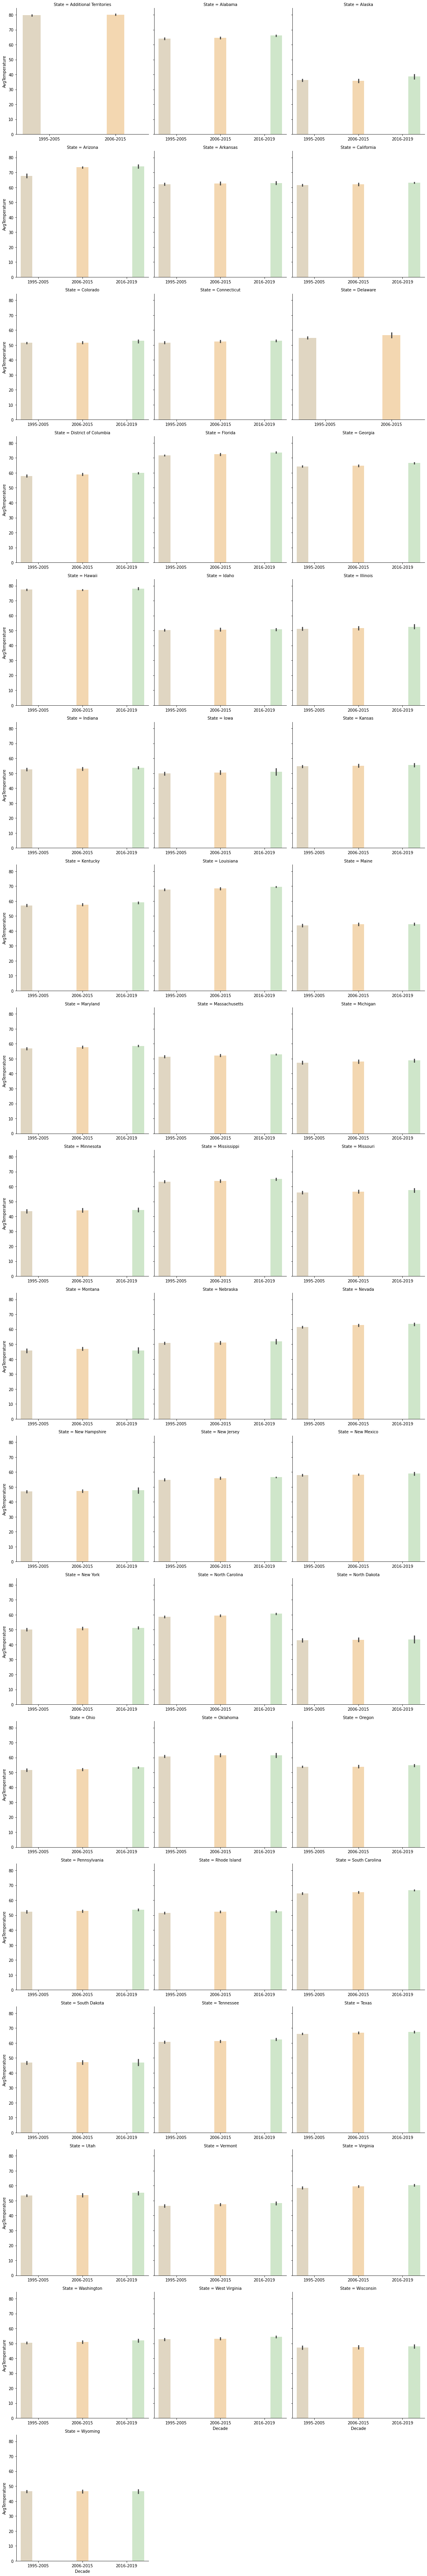

In [ ]:
colors=['blue','purple','green']
g = sns.catplot(x="Decade", y="AvgTemperature",
                  col="State",kind='bar',hue='Decade',col_wrap=3,palette="Pastel1_r",sharex=False,
                 data=USA_decade_avg,legend_out=True)

In [ ]:
USA_trends=pd.DataFrame(USA_decade.groupby(['Decade','Year'])['AvgTemperature'].mean())
USA_trends=USA_trends.reset_index()
USA_trends.head()

,Decade,Year,AvgTemperature
0,1995-2005,1995,55.164868
1,1995-2005,1996,53.659705
2,1995-2005,1997,54.365180
3,1995-2005,1998,56.926371
4,1995-2005,1999,56.043380


In [ ]:
fig = px.scatter(USA_trends, x="Year", y="AvgTemperature", size="AvgTemperature", color="Decade",
            log_x=True, size_max=60)
fig.show(renderer="colab")

In [ ]:
fig = px.scatter(USA_trends, x="Year", y="AvgTemperature", size="AvgTemperature", color="Year",
            log_x=True, size_max=60)
fig.show(renderer="colab")

In [ ]:
import plotly.express as px
fig = px.line(USA_trends, x="Year", y="AvgTemperature", line_group="Decade",color="Decade",
           hover_name="Year", log_x=True)
fig.show(renderer="colab")

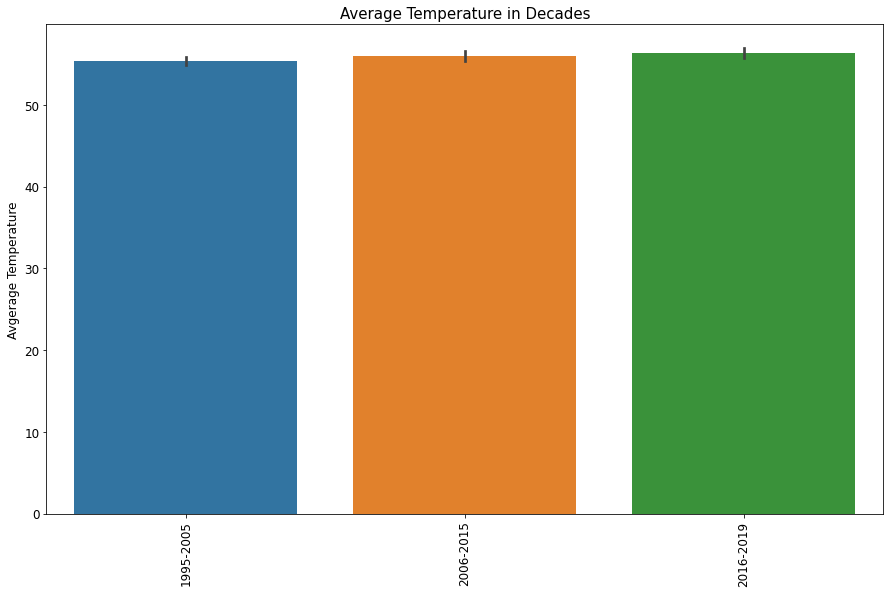

In [ ]:
plt.figure(figsize = (15,9))
sns.barplot(x = USA_trends.Decade,y = "AvgTemperature",data = USA_trends)
plt.yticks(size = 12)
plt.xticks(size = 12,rotation = 90)
plt.xlabel(None)
plt.ylabel("Avgerage Temperature",size = 12)
plt.title("Average Temperature in Decades",size = 15)
plt.show()

In [ ]:
avg_temp_decade=pd.DataFrame(USA_trends.groupby('Decade')['AvgTemperature'].mean())
avg_temp_decade=avg_temp_decade.reset_index()
avg_temp_decade

,Decade,AvgTemperature
0,1995-2005,55.367547
1,2006-2015,55.941685
2,2016-2019,56.350677


In [ ]:
fig = px.box(avg_temp_decade,y='AvgTemperature',x='Decade',color='Decade')
fig.show(renderer="colab")